In [1]:
import pandas as pd

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("./merged_pre_processed.csv", low_memory=False)

In [3]:
data.head()

,Unnamed: 0,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,613404,59.166.0.7,27382,149.171.126.8,53,udp,CON,0.001046,132,164,...,,2,3,1,9,1,1,1,Normal,0
1,671852,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000007,264,0,...,,57,57,56,56,56,20,57,Normal,0
2,391447,59.166.0.7,15578,149.171.126.1,34872,tcp,FIN,0.009837,2438,18508,...,,3,2,3,6,1,1,1,Normal,0
3,591363,175.45.176.0,16421,149.171.126.15,179,tcp,FIN,1.887100,1006,702,...,,5,2,1,2,2,1,2,Normal,0
4,478920,59.166.0.2,33699,149.171.126.2,5190,tcp,FIN,0.004115,1036,2262,...,,7,7,3,3,2,1,3,Normal,0


In [4]:
data.drop(["Unnamed: 0"], axis=1,inplace=True)

In [5]:
X = data.drop('Label', axis=1)
y = data['Label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [7]:
def objective_function(features):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[:, features], y, test_size=0.3, random_state=42)
    
    # Create a Gaussian Naive Bayes classifier
    clf = GaussianNB()
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy as the objective function value
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [8]:
import numpy as np

def ant_colony_optimization(X, y, n_ants, n_iterations, n_features):
    n_ants = 10
    n_iterations = 100
    n_features = 0.2
    selected_features = ant_colony_optimization(X, y, n_ants, n_iterations, n_features)

In [9]:
data.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.7,27382,149.171.126.8,53,udp,CON,0.001046,132,164,31,...,,2,3,1,9,1,1,1,Normal,0
1,149.171.126.18,47439,175.45.176.3,53,udp,INT,0.000007,264,0,60,...,,57,57,56,56,56,20,57,Normal,0
2,59.166.0.7,15578,149.171.126.1,34872,tcp,FIN,0.009837,2438,18508,31,...,,3,2,3,6,1,1,1,Normal,0
3,175.45.176.0,16421,149.171.126.15,179,tcp,FIN,1.887100,1006,702,254,...,,5,2,1,2,2,1,2,Normal,0
4,59.166.0.2,33699,149.171.126.2,5190,tcp,FIN,0.004115,1036,2262,31,...,,7,7,3,3,2,1,3,Normal,0


In [10]:
data.to_csv("df_reduced_feature_new.csv")

In [11]:
data.dtypes

srcip                object
sport                 int64
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [12]:
categorical_columns =  ['state', 'ct_ftp_cmd', 'attack_cat']
# categorical_columns = [ 'proto',  'state', 'service', 'ct_ftp_cmd', 'attack_cat', ]
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

data2 = data.copy()

data2[categorical_columns] = enc.fit_transform(data2[categorical_columns])

In [13]:
data2.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.7,27382,149.171.126.8,53,udp,2.0,0.001046,132,164,31,...,0.0,2,3,1,9,1,1,1,8.0,0
1,149.171.126.18,47439,175.45.176.3,53,udp,5.0,0.000007,264,0,60,...,0.0,57,57,56,56,56,20,57,8.0,0
2,59.166.0.7,15578,149.171.126.1,34872,tcp,4.0,0.009837,2438,18508,31,...,0.0,3,2,3,6,1,1,1,8.0,0
3,175.45.176.0,16421,149.171.126.15,179,tcp,4.0,1.887100,1006,702,254,...,0.0,5,2,1,2,2,1,2,8.0,0
4,59.166.0.2,33699,149.171.126.2,5190,tcp,4.0,0.004115,1036,2262,31,...,0.0,7,7,3,3,2,1,3,8.0,0


In [14]:
columns_drop = ['sttl','swin','dwin','stcpb','dtcpb','dmeansz','Stime','Ltime','ct_state_ttl','ct_srv_src',
                'ct_srv_dst','ct_src_ ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']  

In [15]:
data = data.drop(columns_drop, axis=1)
data2 = data2.drop(columns_drop, axis=1)

In [16]:
data2.corr()

,sport,state,dur,sbytes,dbytes,dttl,sloss,dloss,Sload,Dload,...,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_ftp_cmd,ct_dst_ltm,attack_cat,Label
sport,1.000000,-0.249923,-0.025382,0.011283,0.044423,0.195113,0.026362,0.055919,-0.170361,0.116256,...,-0.046759,-0.022002,0.134887,0.128097,0.132179,-0.032042,0.168269,-0.074704,0.083930,-0.236604
state,-0.249923,1.000000,0.000980,-0.029431,-0.040153,-0.226235,-0.040180,-0.048544,0.372953,-0.139438,...,-0.011716,-0.078204,-0.089160,-0.083760,-0.088299,0.022486,-0.457978,0.360947,-0.256874,0.650307
dur,-0.025382,0.000980,1.000000,0.225267,0.211833,0.115390,0.236107,0.211200,-0.076231,-0.053062,...,0.202085,0.265424,0.122751,0.119531,0.117269,0.019303,-0.002579,-0.091053,-0.097517,0.025444
sbytes,0.011283,-0.029431,0.225267,1.000000,0.014172,0.068755,0.992883,0.012504,-0.018471,-0.006398,...,-0.002065,-0.000348,0.054027,0.045284,0.059084,-0.001179,-0.007424,-0.025351,-0.008339,0.010864
dbytes,0.044423,-0.040153,0.211833,0.014172,1.000000,0.029965,0.031745,0.994159,-0.063711,0.113026,...,-0.006989,-0.007156,0.001099,-0.003898,0.006116,-0.003812,0.075441,-0.061356,0.070379,-0.116429
dttl,0.195113,-0.226235,0.115390,0.068755,0.029965,1.000000,0.080727,0.039812,-0.253496,-0.073062,...,0.000550,0.049616,0.834412,0.777785,0.832568,-0.015184,-0.063017,-0.316652,-0.433857,0.175306
sloss,0.026362,-0.040180,0.236107,0.992883,0.031745,0.080727,1.000000,0.038275,-0.037728,0.020033,...,-0.003887,-0.000946,0.058310,0.049885,0.062737,-0.002290,0.020802,-0.043506,0.007181,-0.023556
dloss,0.055919,-0.048544,0.211200,0.012504,0.994159,0.039812,0.038275,1.000000,-0.080102,0.137682,...,-0.008735,-0.008360,0.004161,-0.001173,0.009303,-0.004805,0.102200,-0.077792,0.084874,-0.145537
Sload,-0.170361,0.372953,-0.076231,-0.018471,-0.063711,-0.253496,-0.037728,-0.080102,1.000000,-0.176396,...,-0.026698,-0.027582,-0.157147,-0.147718,-0.155540,-0.012489,-0.263095,0.153120,-0.187156,0.311258
Dload,0.116256,-0.139438,-0.053062,-0.006398,0.113026,-0.073062,0.020033,0.137682,-0.176396,1.000000,...,-0.023875,-0.023340,-0.124321,-0.114428,-0.125531,-0.010726,0.289475,-0.167652,0.255955,-0.445515


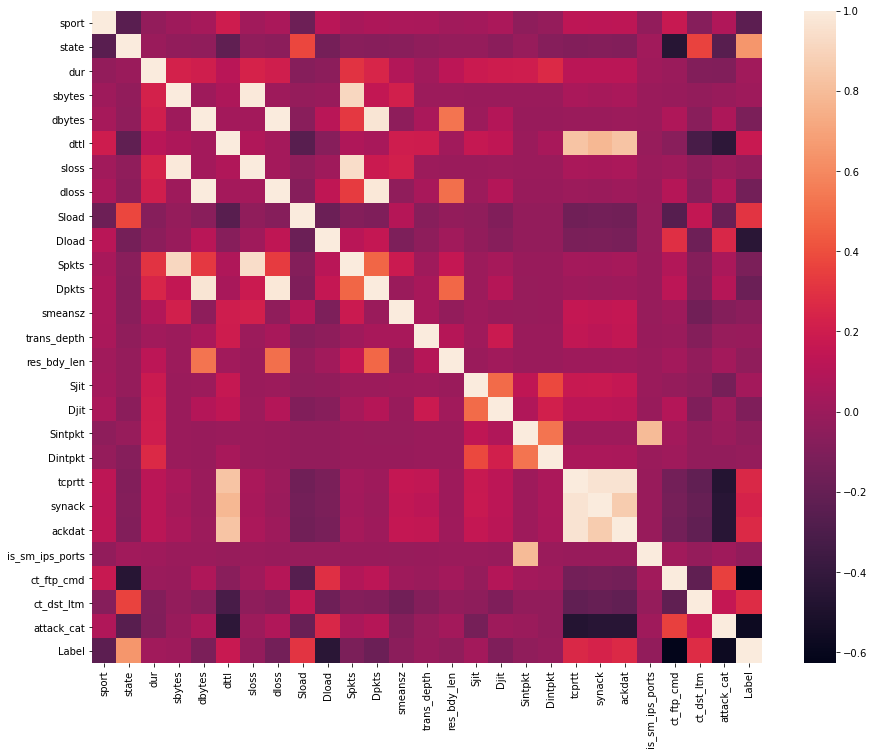

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data2 = data2[[col for col in data2 if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = data2.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [18]:
data2.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,dttl,...,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_ftp_cmd,ct_dst_ltm,attack_cat,Label
0,59.166.0.7,27382,149.171.126.8,53,udp,2.0,0.001046,132,164,29,...,0.009000,0.007000,0.000000,0.000000,0.000000,0,0.0,1,8.0,0
1,149.171.126.18,47439,175.45.176.3,53,udp,5.0,0.000007,264,0,0,...,0.007000,0.000000,0.000000,0.000000,0.000000,0,0.0,56,8.0,0
2,59.166.0.7,15578,149.171.126.1,34872,tcp,4.0,0.009837,2438,18508,29,...,0.256838,0.239615,0.000627,0.000489,0.000138,0,0.0,3,8.0,0
3,175.45.176.0,16421,149.171.126.15,179,tcp,4.0,1.887100,1006,702,252,...,111.005882,160.510453,0.200530,0.120800,0.079730,0,0.0,1,8.0,0
4,59.166.0.2,33699,149.171.126.2,5190,tcp,4.0,0.004115,1036,2262,29,...,0.341909,0.318636,0.000743,0.000601,0.000142,0,0.0,3,8.0,0


In [19]:
data["attack_cat"].value_counts()

Normal              40000
Generic             27883
Exploits            11103
 Fuzzers             4668
DoS                  4637
 Reconnaissance      3115
Analysis              608
Backdoor              370
 Shellcode            324
Worms                  40
Reconnaissance          1
Name: attack_cat, dtype: int64

In [20]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

In [22]:
import pandas as pd

# Load the preprocessed NUSW-NB15 dataset from the CSV file
data = pd.read_csv('./merged_pre_processed.csv')

# Extract features (X) and labels (y) from the dataset
X = data.drop('Label', axis=1)
y = data['Label']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def objective_function(features):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[:, features], y, test_size=0.3, random_state=42)
    
    # Create a Gaussian Naive Bayes classifier
    clf = GaussianNB()
    
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy as the objective function value
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [35]:
import numpy as np
def ant_colony_optimization():

SyntaxError: unexpected EOF while parsing (<ipython-input-35-d90a00b05cd0>, line 2)

In [33]:
# Assuming the previous code has been executed up to this point:

# Number of ants, iterations, and percentage of features to select
n_ants = 10
n_iterations = 100
n_features = 0.2  # Select 20% of features

# Perform feature selection using ACO
selected_features = ant_colony_optimization(X, y, n_ants, n_iterations, n_features)

# Use the selected features for the intrusion detection system
X_selected = X[:, selected_features]

# Train and test the classifier with X_selected and y

# Split the data into training and test sets using the selected features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train a classification model on the training data
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the intrusion detection system
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


RecursionError: maximum recursion depth exceeded